### 读取数据，分析数据结构

In [ ]:
import pandas as pd

#把数据集读进内存，原数据集不改变
df = pd.read_csv("archive\Chocolate Sales (2).csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [ ]:
df.info()
#表一共3282行，有6个列
#这个数据集不存在数据缺失或者数据重复的问题
#需要注意的是点在于，date和amount使用了object字符串类型，前者需要处理为datetime，后者需要处理为数值

In [ ]:
#列名规范化，替换了空格键
df.columns = df.columns.str.replace(" ", "_")
df.head()

### 对数据进行清洗规范

In [ ]:
#注意：清洗格式的操作只能使用一次，整个ipynb文件虽然分为了不同代码框，但是记忆会被继承
# 所以第二次点击这个框的时候会报错，因为这个amount列已经被处理过了

#金额列处理
df["Amount"] = (
    df["Amount"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df["Amount"].head()
df["Amount"].dtype

In [ ]:
#多次运行数据清洗步骤后开始报错，可以检查一下目前的情况
#看前几行
df.head()
#看数据类型
df.dtypes

In [ ]:
#时间列处理
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Date"].head()
df["Date"].dtype

### 分析数据环节

1. 时间维度分析（每年的月度为单位）

In [ ]:
df["YearMonth"] = df["Date"].dt.to_period("M")
df[["Date", "YearMonth"]].head()

In [ ]:
monthly_sales = (
    df
    .groupby("YearMonth")["Amount"]
    .sum()
    .reset_index()
)

monthly_sales.head()


In [ ]:
#画年走势图
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["YearMonth"].astype(str),
         monthly_sales["Amount"],
         marker="o")

plt.title("Monthly Chocolate Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

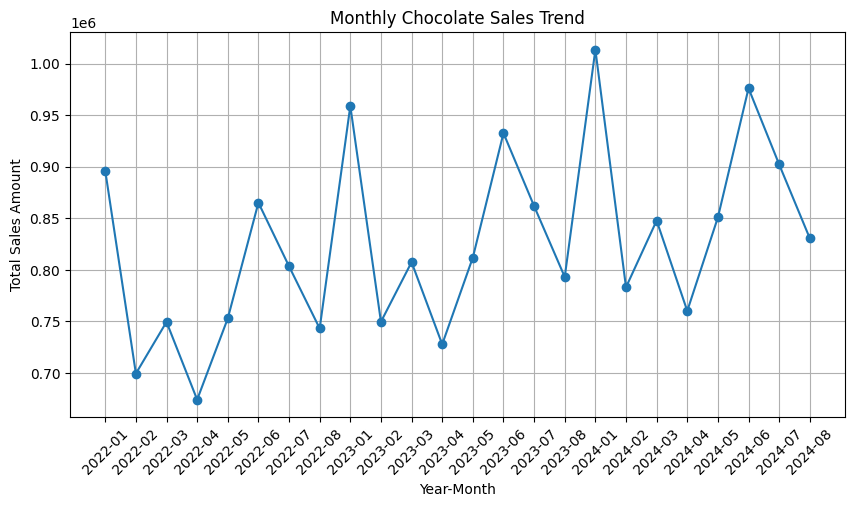

2. 国家维度分析销售额

In [ ]:
country_sales = (
    df
    .groupby("Country")["Amount"]
    .sum()
    .reset_index()
    .sort_values(by="Amount", ascending=False)
)

country_sales.head()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(country_sales["Country"], country_sales["Amount"])
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


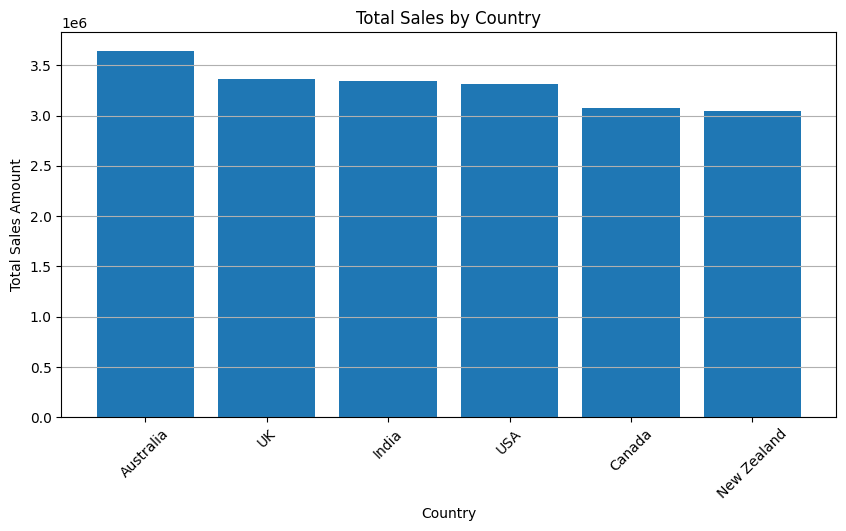

3. 畅销的产品

In [27]:
product_sales = (
    df
    .groupby("Product")["Amount"]
    .sum()
    .reset_index()
    .sort_values(by="Amount", ascending=False)
    .head(5)
)

product_sales


,Product,Amount
19,Smooth Sliky Salty,1120201.09
0,50% Dark Bites,1087659.35
21,White Choc,1054257.00
17,Peanut Butter Cubes,1036591.09
10,Eclairs,996947.96


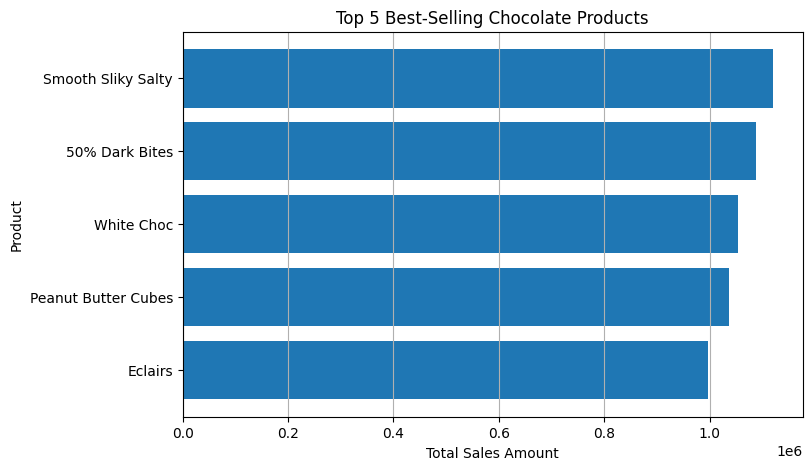

In [ ]:
#横向柱状图表示
plt.figure(figsize=(8, 5))
plt.barh(product_sales["Product"], product_sales["Amount"])
plt.title("Top 5 Best-Selling Chocolate Products")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # 让第一名在最上面
plt.grid(axis="x")
plt.show()


In [ ]:
#饼图表示
plt.figure(figsize=(6, 6))
plt.pie(
    product_sales["Amount"],
    labels=product_sales["Product"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Sales Share of Top 5 Chocolate Products")
plt.axis("equal")
plt.show()


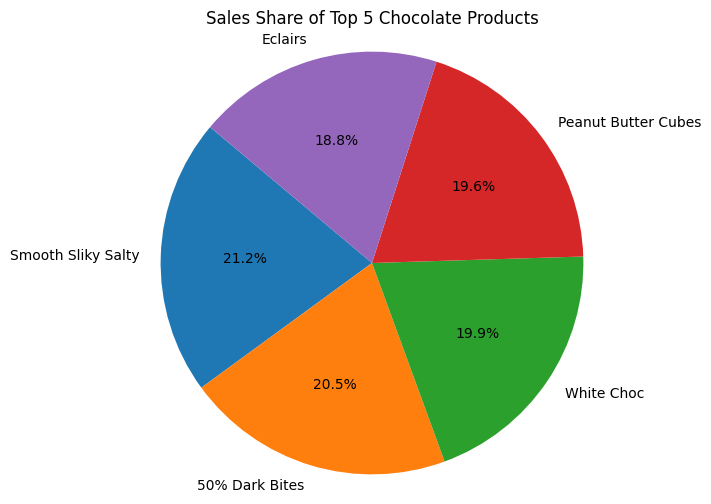